In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df.shape

(5572, 5)

In [4]:
# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True) 

In [7]:
df.sample(5)

,v1,v2
3759,ham,We'll join the &lt;#&gt; bus
1382,ham,Its ok my arm is feeling weak cuz i got a shot...
4627,spam,Todays Voda numbers ending with 7634 are selec...
4975,ham,You are gorgeous! keep those pix cumming :) th...
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...


In [8]:
# renaming the feature
df.rename(columns={'v1': 'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
3350,ham,At what time are you coming.
3831,ham,Ok.
3540,ham,If you are not coughing then its nothing
4503,ham,She told to hr that he want posting in chennai...
5475,ham,Dhoni have luck to win some big title.so we wi...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
df = df.drop_duplicates(keep= 'first')

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [17]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

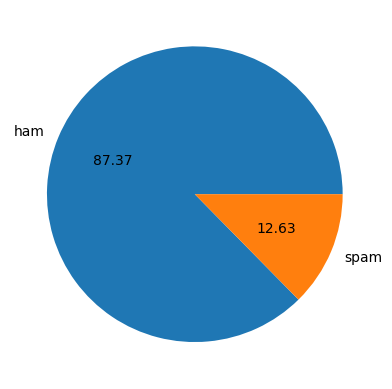

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

# Data is imbalance

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
import nltk
nltk.data.path.append('C:/nltk_data/')  # Append your desired path here

# Download 'punkt' to the specified path
nltk.download('punkt', download_dir='C:/nltk_data/')


[nltk_data] Downloading package punkt to C:/nltk_data/...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))


In [26]:
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
from nltk.tokenize import PunktSentenceTokenizer

# Initialize the sentence tokenizer
sentence_tokenizer = PunktSentenceTokenizer()

# Apply sentence tokenization and count the number of sentences in each text
df['num_sentences'] = df['text'].apply(lambda x: len(sentence_tokenizer.tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,1
1,0,Ok lar... Joking wif u oni...,29,8,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,17.695299,1.919714
std,58.236293,12.672457,1.428215
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,1.000000
75%,117.000000,25.000000,2.000000
max,910.000000,214.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.452613,1.767715
std,56.358207,12.858450,1.353829
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,38.000000


In [31]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,26.289433,2.970904
std,30.137753,6.579189,1.486363
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,30.000000,4.000000
max,224.000000,41.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

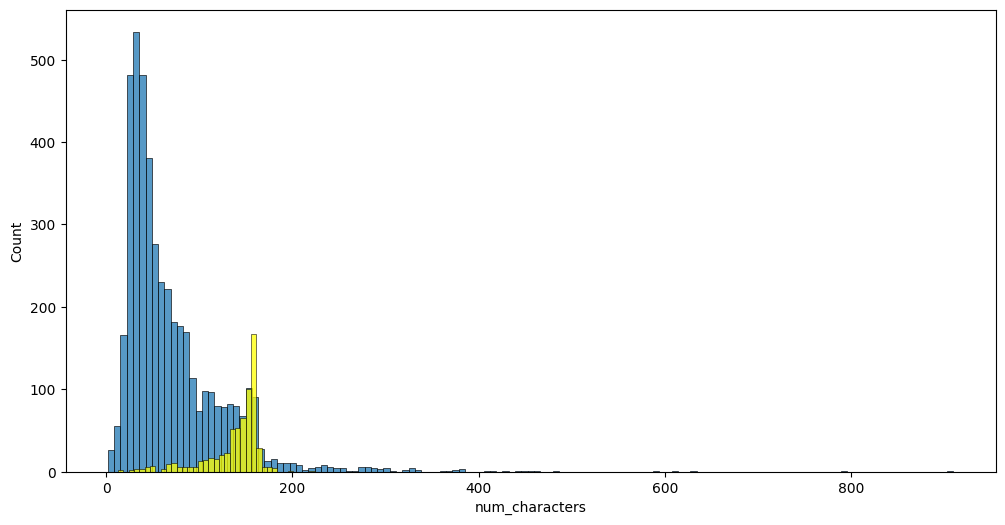

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

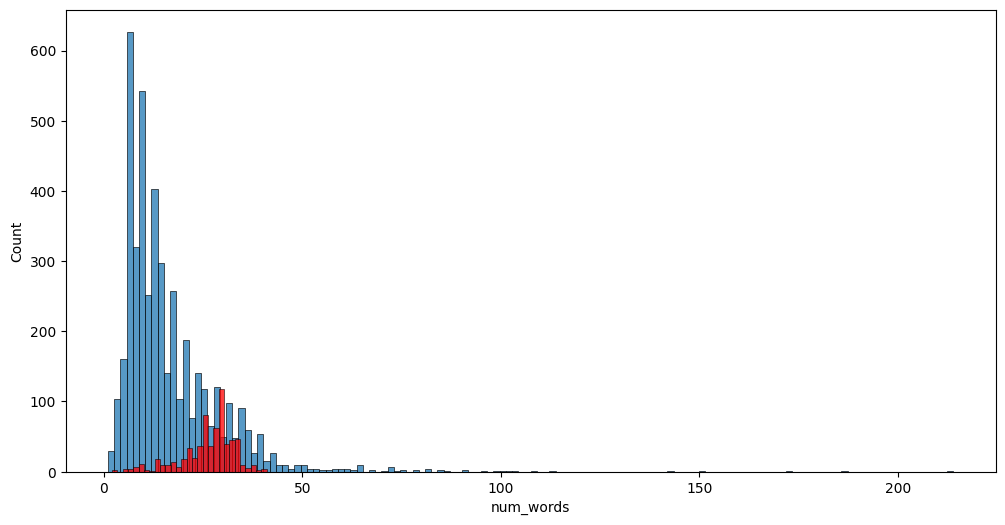

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

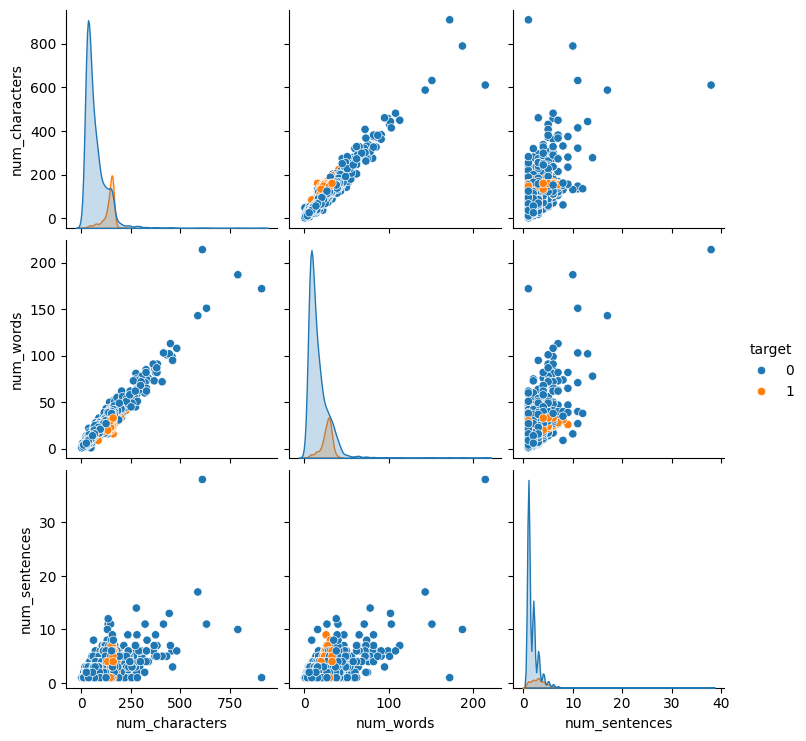

In [35]:
sns.pairplot(df, hue='target')


In [36]:
# Select only numeric columns for the correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.257907       0.279904
num_characters  0.384717        1.000000   0.964008       0.608847
num_words       0.257907        0.964008   1.000000       0.629392
num_sentences   0.279904        0.608847   0.629392       1.000000


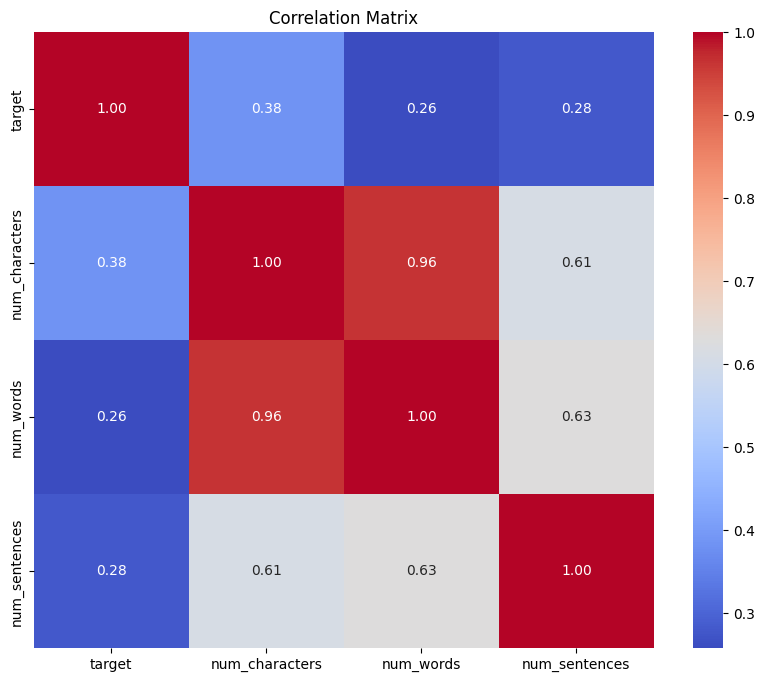

In [37]:
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Prepocessing

In [38]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

# Initialize tokenizer and stemmer
tokenizer = TreebankWordTokenizer()
ps = PorterStemmer()

# Function to transform text (lowercase, tokenize, remove special chars, stopwords, and apply stemming)
def transform_text(text):
    text = text.lower()  
    text = tokenizer.tokenize(text)  
    
    
    y = [i for i in text if i.isalnum()]
    
    filtered_words = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]
    
    stemmed_words = [ps.stem(i) for i in filtered_words]
    
    return " ".join(stemmed_words)



[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
print(transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."))


gon na home soon want talk stuff anymor tonight k cri enough today


In [40]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
df['transformed_text']= df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,1,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1] ['transformed_text'].str.cat(sep=" "))

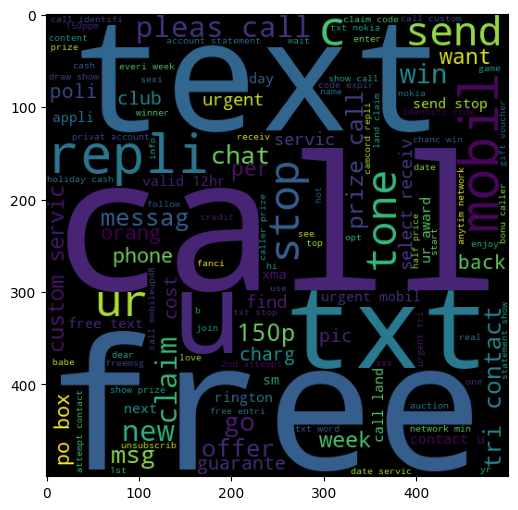

In [46]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0] ['transformed_text'].str.cat(sep=" "))

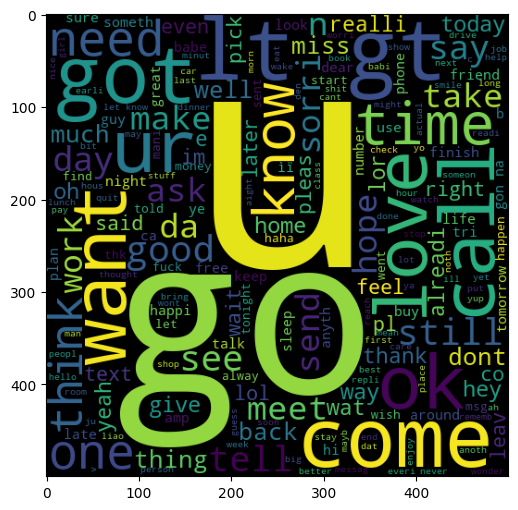

In [48]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [49]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9339

In [51]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

33008

# Model Deploy 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [56]:
X.shape

(5169, 3000)

In [57]:
y = df['target'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[768 128]
 [ 17 121]]
0.4859437751004016


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[888   8]
 [ 15 123]]
0.9389312977099237


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[895   1]
 [ 20 118]]
0.9915966386554622


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : SVC(),
    'KN' : KNeighborsClassifier(), 
    'NB': MultinomialNB(), 
    'DT': DecisionTreeClassifier(), 
    'LR': LogisticRegression(), 
    'RF': RandomForestClassifier(), 
    'AdaBoost': AdaBoostClassifier(), 
    'BgC': BaggingClassifier(), 
    'ETC': ExtraTreesClassifier(),
    'GBDT': GradientBoostingClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
}


In [69]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    
    accuracy = accuracy_score(y_test, y_pred)  
    precision = precision_score(y_test, y_pred)  
    
    return accuracy, precision 

In [70]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, np.float64(0.9586776859504132))

In [71]:
accuracy_scores = []
precision_scores = []

# Loop through classifiers and train each one
for name, clf in clfs.items():
    print(f"\nFor {name}")
    
    # Special case for XGBoost to suppress warnings
    if name == 'xgb':
        clf.set_params(use_label_encoder=False, eval_metric='logloss')

    # Train the classifier and get accuracy and precision
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f"Accuracy -  {current_accuracy}")
    print(f"Precision -  {current_precision}")

    # Store the results
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Print final results
print("\nFinal Results:")
for i, name in enumerate(clfs.keys()):
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy_scores[i]}")
    print(f"Precision: {precision_scores[i]}")



For SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667

For KN
Accuracy -  0.9042553191489362
Precision -  1.0

For NB
Accuracy -  0.9777562862669246
Precision -  0.9389312977099237

For DT
Accuracy -  0.9506769825918762
Precision -  0.8372093023255814

For LR
Accuracy -  0.971953578336557
Precision -  0.9823008849557522

For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829

For AdaBoost


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy -  0.9642166344294004
Precision -  0.9316239316239316

For BgC
Accuracy -  0.9535783365570599
Precision -  0.8629032258064516

For ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243

For GBDT
Accuracy -  0.9584139264990329
Precision -  0.9357798165137615

For xgb


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:07:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy -  0.9709864603481625
Precision -  0.9426229508196722

Final Results:
Classifier: SVC
Accuracy: 0.9748549323017408
Precision: 0.9666666666666667
Classifier: KN
Accuracy: 0.9042553191489362
Precision: 1.0
Classifier: NB
Accuracy: 0.9777562862669246
Precision: 0.9389312977099237
Classifier: DT
Accuracy: 0.9506769825918762
Precision: 0.8372093023255814
Classifier: LR
Accuracy: 0.971953578336557
Precision: 0.9823008849557522
Classifier: RF
Accuracy: 0.9758220502901354
Precision: 0.9829059829059829
Classifier: AdaBoost
Accuracy: 0.9642166344294004
Precision: 0.9316239316239316
Classifier: BgC
Accuracy: 0.9535783365570599
Precision: 0.8629032258064516
Classifier: ETC
Accuracy: 0.9777562862669246
Precision: 0.9831932773109243
Classifier: GBDT
Accuracy: 0.9584139264990329
Precision: 0.9357798165137615
Classifier: xgb
Accuracy: 0.9709864603481625
Precision: 0.9426229508196722


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
8,ETC,0.977756,0.983193
5,RF,0.975822,0.982906
4,LR,0.971954,0.982301
0,SVC,0.974855,0.966667
10,xgb,0.970986,0.942623
2,NB,0.977756,0.938931
9,GBDT,0.958414,0.935780
6,AdaBoost,0.964217,0.931624
7,BgC,0.953578,0.862903


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,ETC,Accuracy,0.977756
2,RF,Accuracy,0.975822
3,LR,Accuracy,0.971954
4,SVC,Accuracy,0.974855
5,xgb,Accuracy,0.970986
6,NB,Accuracy,0.977756
7,GBDT,Accuracy,0.958414
8,AdaBoost,Accuracy,0.964217
9,BgC,Accuracy,0.953578


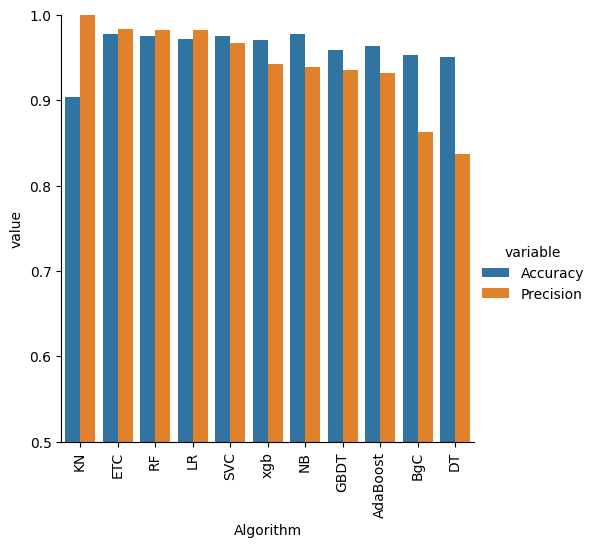

In [76]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [80]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [81]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [82]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [83]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [84]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [85]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [86]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [87]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9761904761904762


In [88]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [89]:
from sklearn.ensemble import StackingClassifier

In [90]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [91]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [92]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))